In [98]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Problem 1:**

### File Separation:

In [99]:
# load dataset
train_data = np.loadtxt('../HW2_material/MNISTnumImages5000_balanced.txt', dtype=float)
train_labels = np.loadtxt('../HW2_material/MNISTnumLabels5000_balanced.txt', dtype=float)

In [100]:
def create_file(i):
    currentFile = open('../assets/' + str(i) + '.txt', 'w')
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == i]
    data = ""
    for i in range(len(img)):
        for j in range(len(img[i])):
            temp_data = str(img[i][j])
            data += temp_data + "\t"
        data += "\n"
    currentFile.write(data)
    currentFile.close()

# this function is used to take 400 label-digits of 0 and 1 to combine into 1 training_dataset
def combine_lst(num_label):
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == num_label]
    # to keep track of label, we will then add the label to the end of image
    for i in range(len(img)):
        img[i] = np.append(img[i], num_label)
    res = list()
    for i in range(400):
        res.append(img[i])
    return res

training_dataset = combine_lst(0) + combine_lst(1)
random.shuffle(training_dataset)


def make_dataset(num_label): 
    img = [train_data[key] for (key, label) in enumerate(train_labels) if int(label) == num_label]
    for i in range(len(img)):
        img[i] = np.append(img[i], num_label)
    res = list()
    for i in range(400, 500):
        res.append(img[i])
    return res


test_dataset = list()
challenge_dataset = list()


for i in range(10):
    if i == 0 or i == 1:
        test_dataset += make_dataset(i)
    elif i in [n for n in range(2, 10)]:
        challenge_dataset += make_dataset(i)
        
random.shuffle(challenge_dataset)
random.shuffle(test_dataset)

def create_dataset(name, dataset):
    currentFile = open('../assets/' + name + '.txt', 'w')
    data = ""
    for i in range(len(dataset)):
        for j in range(len(dataset[i])):
            temp_data = str(dataset[i][j])
            data += temp_data + "\t"
        data += "\n"
    currentFile.write(data)
    currentFile.close()    

In [101]:
# Create data files
for i in range(10):
    if i == 0 or i == 1 or i == 7 or i == 9:
        create_file(i)
create_dataset('challenge_dataset', challenge_dataset)
create_dataset('test_dataset', test_dataset)
create_dataset('training_dataset', training_dataset)

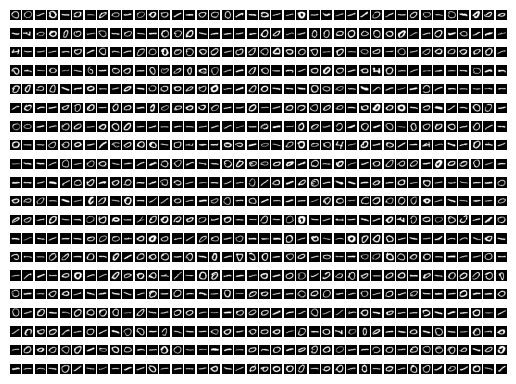

In [102]:
# for testing purpose
file_test = np.loadtxt('../assets/training_dataset.txt', dtype=float)
for i in range(0, 800):
    image = file_test[i][0:784].reshape((28, 28))
    plt.subplot(20, 40, i + 1)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
plt.show()

### Threshold Generator:

In [103]:
train_ds = np.loadtxt('../assets/training_dataset.txt', dtype=float)
test_ds = np.loadtxt('../assets/test_dataset.txt', dtype=float)
challenge_ds = np.loadtxt('../assets/challenge_dataset.txt', dtype=float)

# initialize variables
w = np.random.uniform(0, 0.5, [784])
w_init = w.copy()
learning_rate = 0.1
EPOCH = 40
# theta = [i for i in range(41)]

# print(w)
def threshold():
    teaching_rate = 0
    # input_layer = np.dot(w, np.transpose(train_ds[counter][0:784]))
    np.random.shuffle(train_ds)
    
    for t, image in enumerate(train_ds):
        teaching_rate = int(image[784])
        for j, x in enumerate(w):
            x = x + learning_rate * teaching_rate * (train_ds[t][j] - x)
            w[j] = x
# threshold()

In [104]:
for _ in range(EPOCH):
    threshold()
# print(w)

### Confused Matrix

In [105]:
def confused_matrix():
    precision, recall, f1_score, true_pos, false_pos, confuse_value = [], [], [], [], [], [] 
    for i in range(40): # theta is 40
        tp, tn, fp, fn = 0, 0, 0, 0
        for j, iput in enumerate(test_ds):
            y_label = iput[784]
            value_input = np.dot(np.transpose(iput[0:784]), w)
            y_value = 1 if value_input > i else 0
            if y_value == 1:
                if y_label == 1:
                    tp += 1
                else:
                    fp += 1
            elif y_value == 0:
                if y_label == 1:
                    fn += 1
                else:
                    tn += 1
                    
        true_pos.append(tp)
        false_pos.append(fp)
        
        try:
            precision.append(tp / (tp + fp))
            recall.append(tp / (tp + fn))
            f1_score.append((2 * (precision[i] * recall[i])) / (precision[i] + recall[i]))
        except ZeroDivisionError:
            pass
        
        confuse_value.append([i,tp,tn,fp,fn])
        
    return [precision, recall, f1_score, true_pos, false_pos, confuse_value]         

### Precision, Recall, F1 Score, ROC diagram

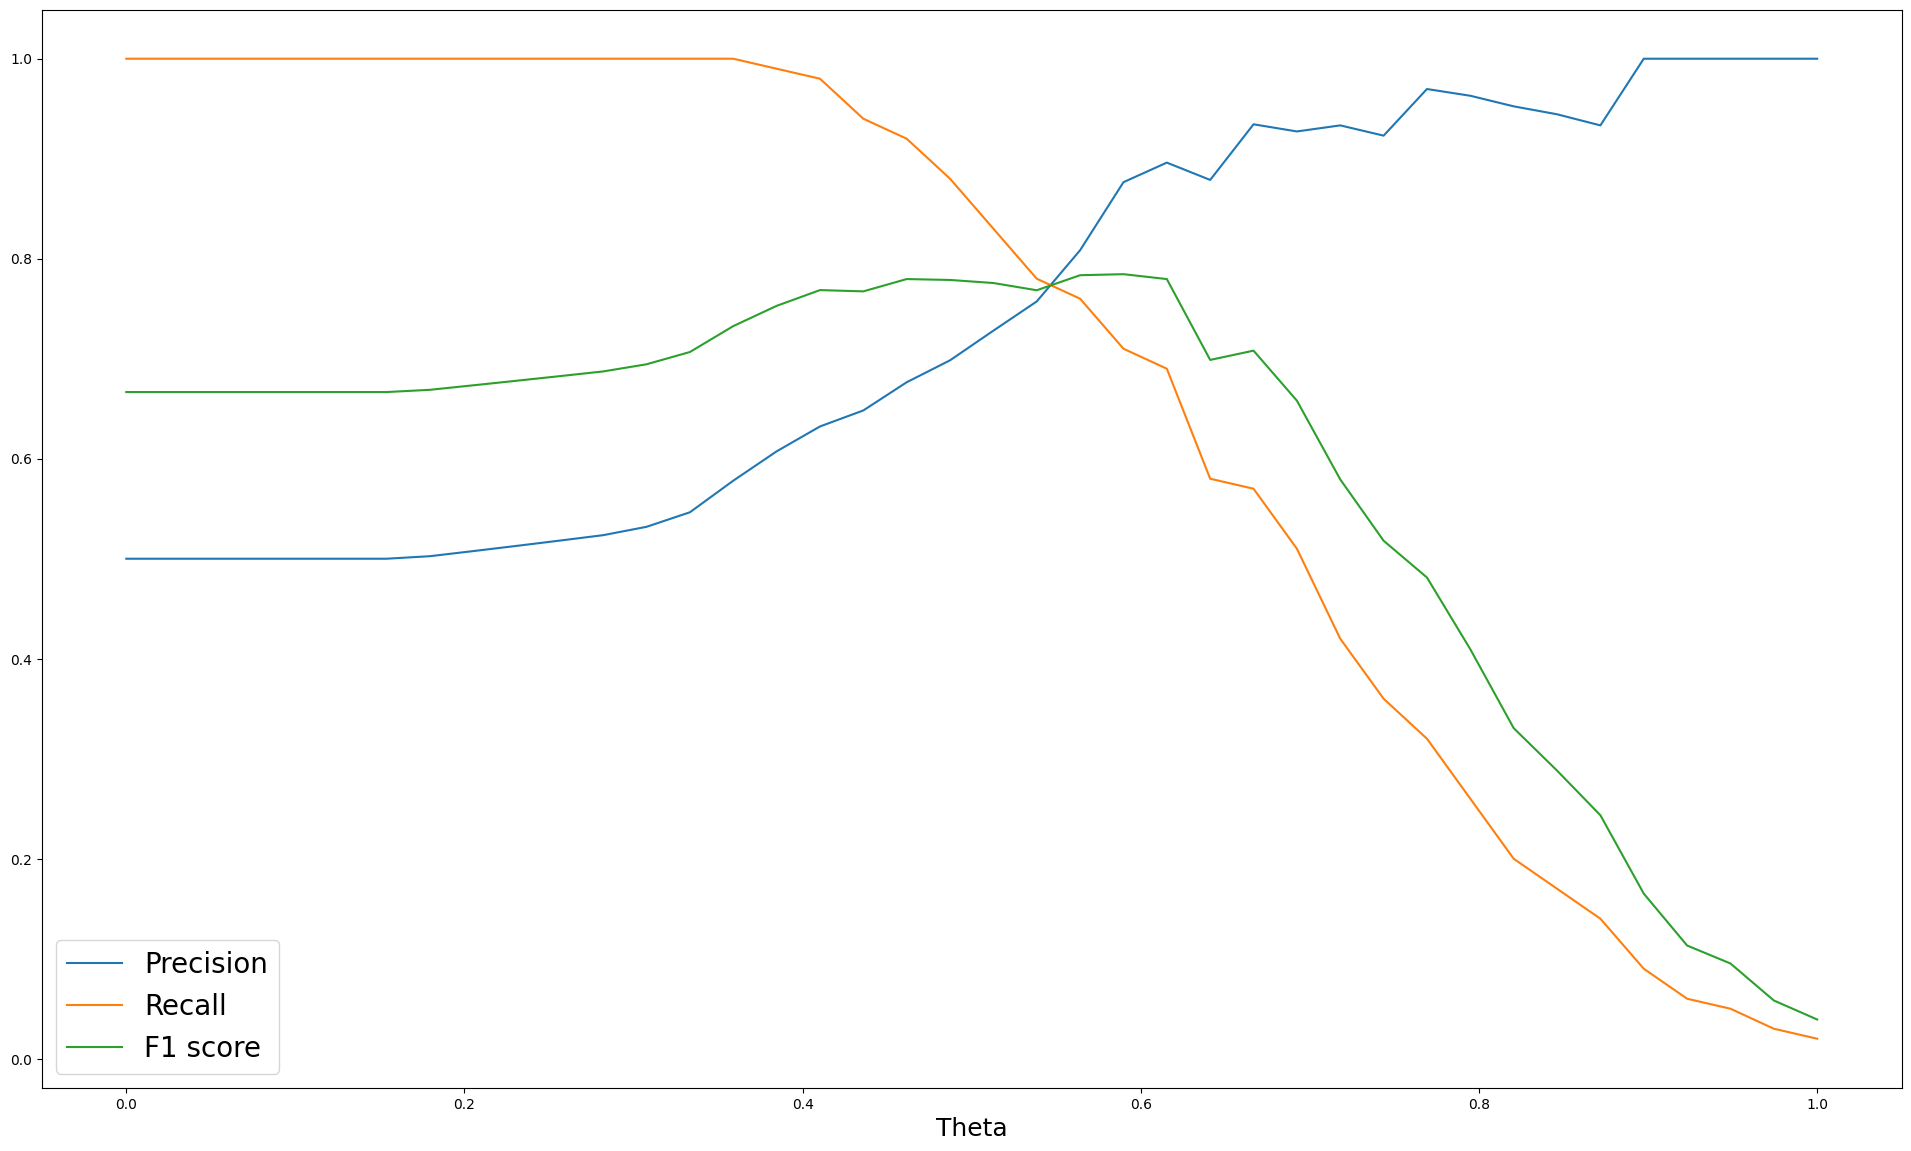

In [106]:
evaluation = confused_matrix()
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 14))
labels_graph = ['Precision', 'Recall', 'F1 score']

# precision, recall, f1 score
for i in range(3):
    plt.plot(np.linspace(0, 1, 40), evaluation[i], label= labels_graph[i])
plt.legend(prop={'size': 20})
    
plt.xlabel('Theta', fontsize=18)
plt.savefig('../assets/figure1.png')
plt.show()

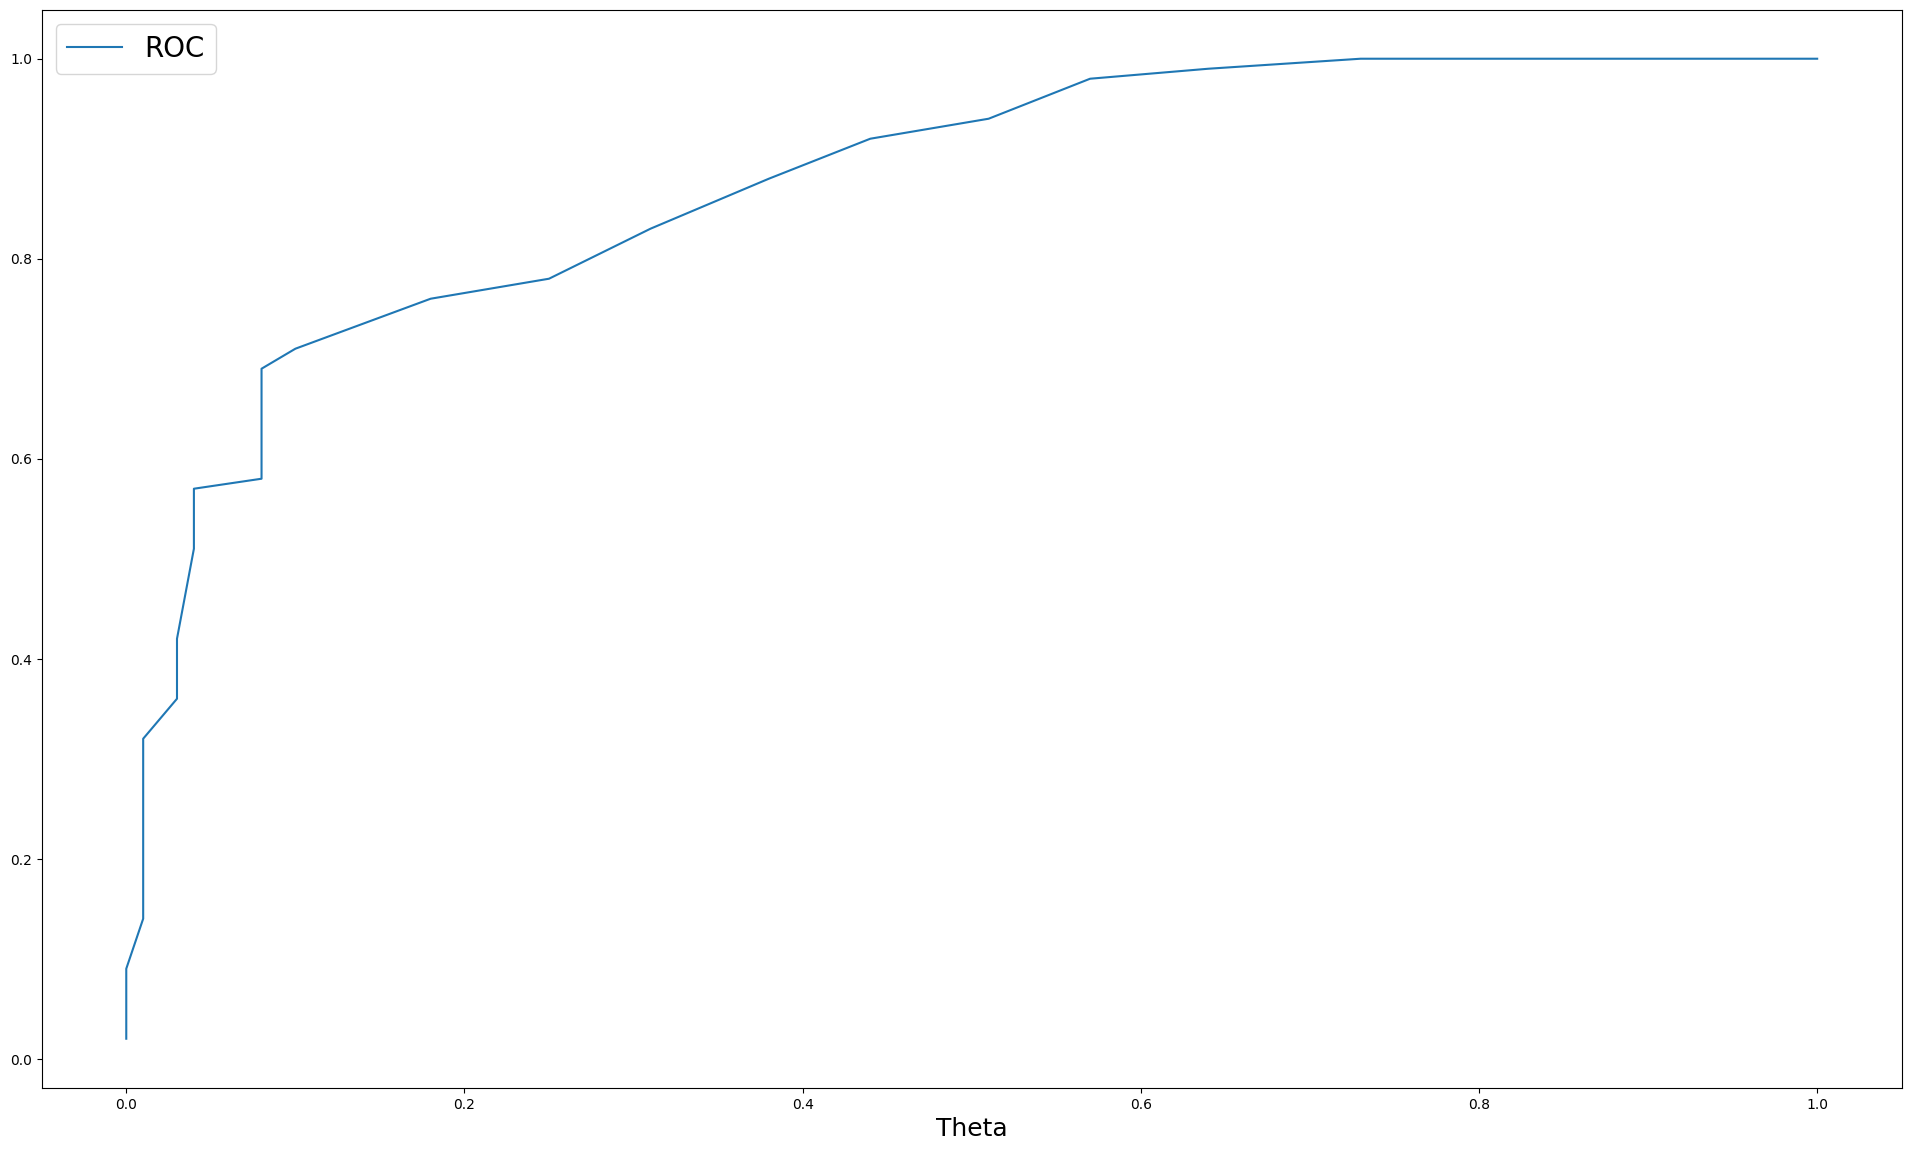

In [107]:
fig = plt.subplots(1, 1, sharex=True, figsize=(24, 14))
true_pos = [i/100 for i in evaluation[3]]
false_pos = [i/100 for i in evaluation[4]]

plt.plot(false_pos, true_pos, label='ROC')
plt.legend(prop={'size': 20})
plt.xlabel('Theta', fontsize=18)
plt.savefig('../assets/figure2.png')
plt.show()

### Heat Map

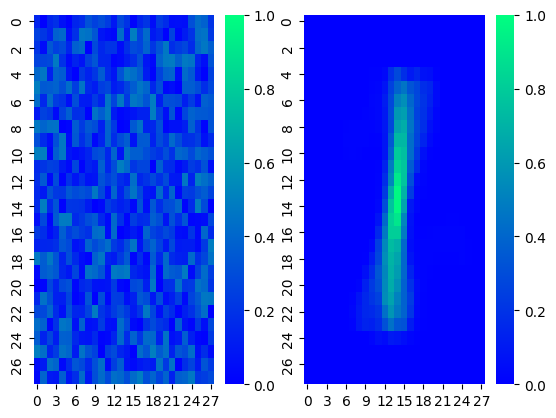

In [108]:
init_w = np.asarray(w_init)
final_w = np.asarray(w)
init_w_img = init_w.reshape(28, 28)
final_w_img = final_w.reshape(28, 28)
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.heatmap(init_w_img, ax=ax1, vmin=0, vmax=1, cmap = 'winter')
sns.heatmap(np.transpose(final_w_img), ax=ax2, vmin=0, vmax=1, cmap = 'winter')
plt.savefig('../assets/figure3.png')
plt.show()

### Optimal Threshold

In [109]:
val_threshold = []
for i in range(len(false_pos)):
    val_threshold.append(true_pos[i] - false_pos[i])

opt_idx = val_threshold.index(max(val_threshold))

def optimal_threshold():
    global opt_idx
    thres_dict = {2 : [0, 0], 3 : [0, 0],
                  4 : [0, 0], 5 : [0, 0],
                  6 : [0, 0], 7 : [0, 0],
                  8 : [0, 0], 9 : [0, 0]}
    for counter, x in enumerate(challenge_ds):
        y_label = int(x[784])
        challenge_input = np.dot(np.transpose(x[0:784]), w)
        y_value = 1 if challenge_input > opt_idx else 0
        if y_value == 0:
            thres_dict[y_label][0] += 1
        elif y_value == 1:
            thres_dict[y_label][1] += 1
    df = pd.DataFrame(thres_dict)
    return df

print(optimal_threshold())

    2   3   4   5   6   7   8   9
0  48  53  86  84  56  70  18  76
1  52  47  14  16  44  30  82  24


# **Problem 2**

### Activation

In [110]:
def activation(iput):
    return 1 if iput > 0 else 0

### Perceptron

In [111]:
EPOCH = 100

def perceptron():
    bias = 1
    w = np.random.uniform(0, 0.5, (784))
    w_init = w.copy()
    learning_rate = 0.001
    training_error = list()
    test_error = list()
    bias_update = list()
    for i in range(EPOCH):
        error = 0
        error_test = 0
        np.random.shuffle(train_ds)
        for t, image in enumerate(train_ds):
            x = image[0:784]
            y = int(image[784])
            s = np.dot(np.transpose(x), w) + bias
            y_value = activation(s)
            if y_value != int(y):
                error += 1

            w = w + learning_rate * (y - y_value) * x
            bias = bias + learning_rate * (y - y_value)
        training_error.append(float(error/800.0))
        bias_update.append(bias)
    
        for t, image in enumerate(test_ds):
            y = int(image[784])
            s = np.dot(np.transpose(image[0:784]), w) + bias
            y_value = activation(s)
            if y_value != int(y):
                error_test += 1

        test_error.append(float(error_test/200.0))
   
    return [training_error, test_error, w, w_init, bias_update]        

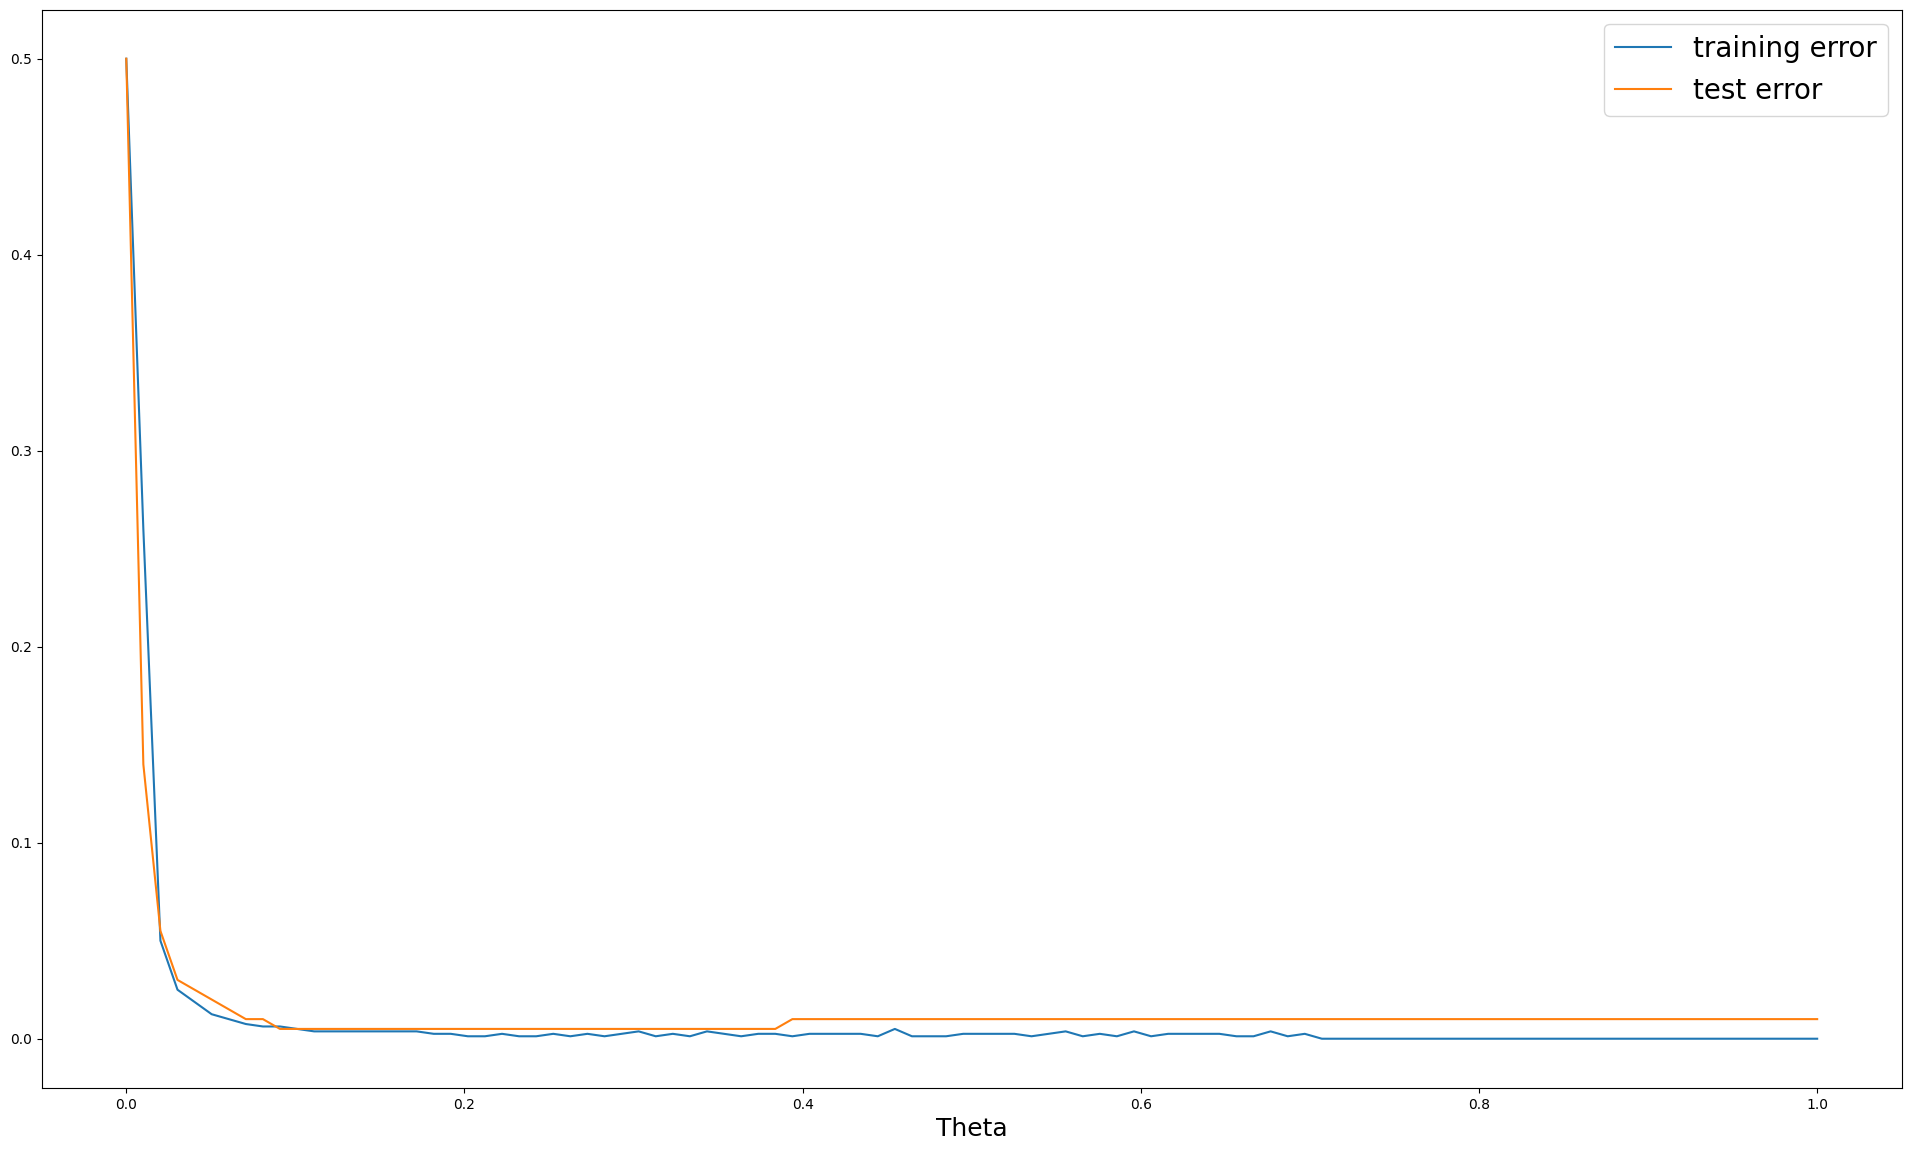

In [112]:
values = perceptron()
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(24, 14))
graph_labels = ['training error', 'test error']

count = 0
for i in values:
    if count == 2: break
    plt.plot(np.linspace(0, 1, 100), i, label=graph_labels[count])
    count += 1
plt.legend(prop={'size': 20})
plt.xlabel('Theta', fontsize=18)
plt.savefig('../assets/figure4.png')
plt.show()

### Perceptron Confused Matrix

In [113]:
def perceptron_conf(weight):
    precision, recall, f1_score, true_pos, false_pos, confuse_value = 0, 0, 0, 0, 0, []
    # for i in range(40): # theta is 40
    tp, tn, fp, fn = 0, 0, 0, 0
    for j, iput in enumerate(test_ds):
        y_label = iput[784]
        value_input = np.dot(np.transpose(iput[0:784]), weight) + values[4][-1]
        y_value = activation(value_input)
        if y_value == 1:
            if y_label == 1:
                tp += 1
            else:
                fp += 1
        elif y_value == 0:
            if y_label == 1:
                fn += 1
            else:
                tn += 1
                
    true_pos = tp
    false_pos = fp
    
    try:
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = (2 * (precision * recall)) / (precision + recall)
    except ZeroDivisionError:
        pass
    
    confuse_value.append([i,tp,tn,fp,fn])
        
    return [precision, recall, f1_score, true_pos, false_pos, confuse_value]       
    

### Bar plot of precision, recall, and f1 score

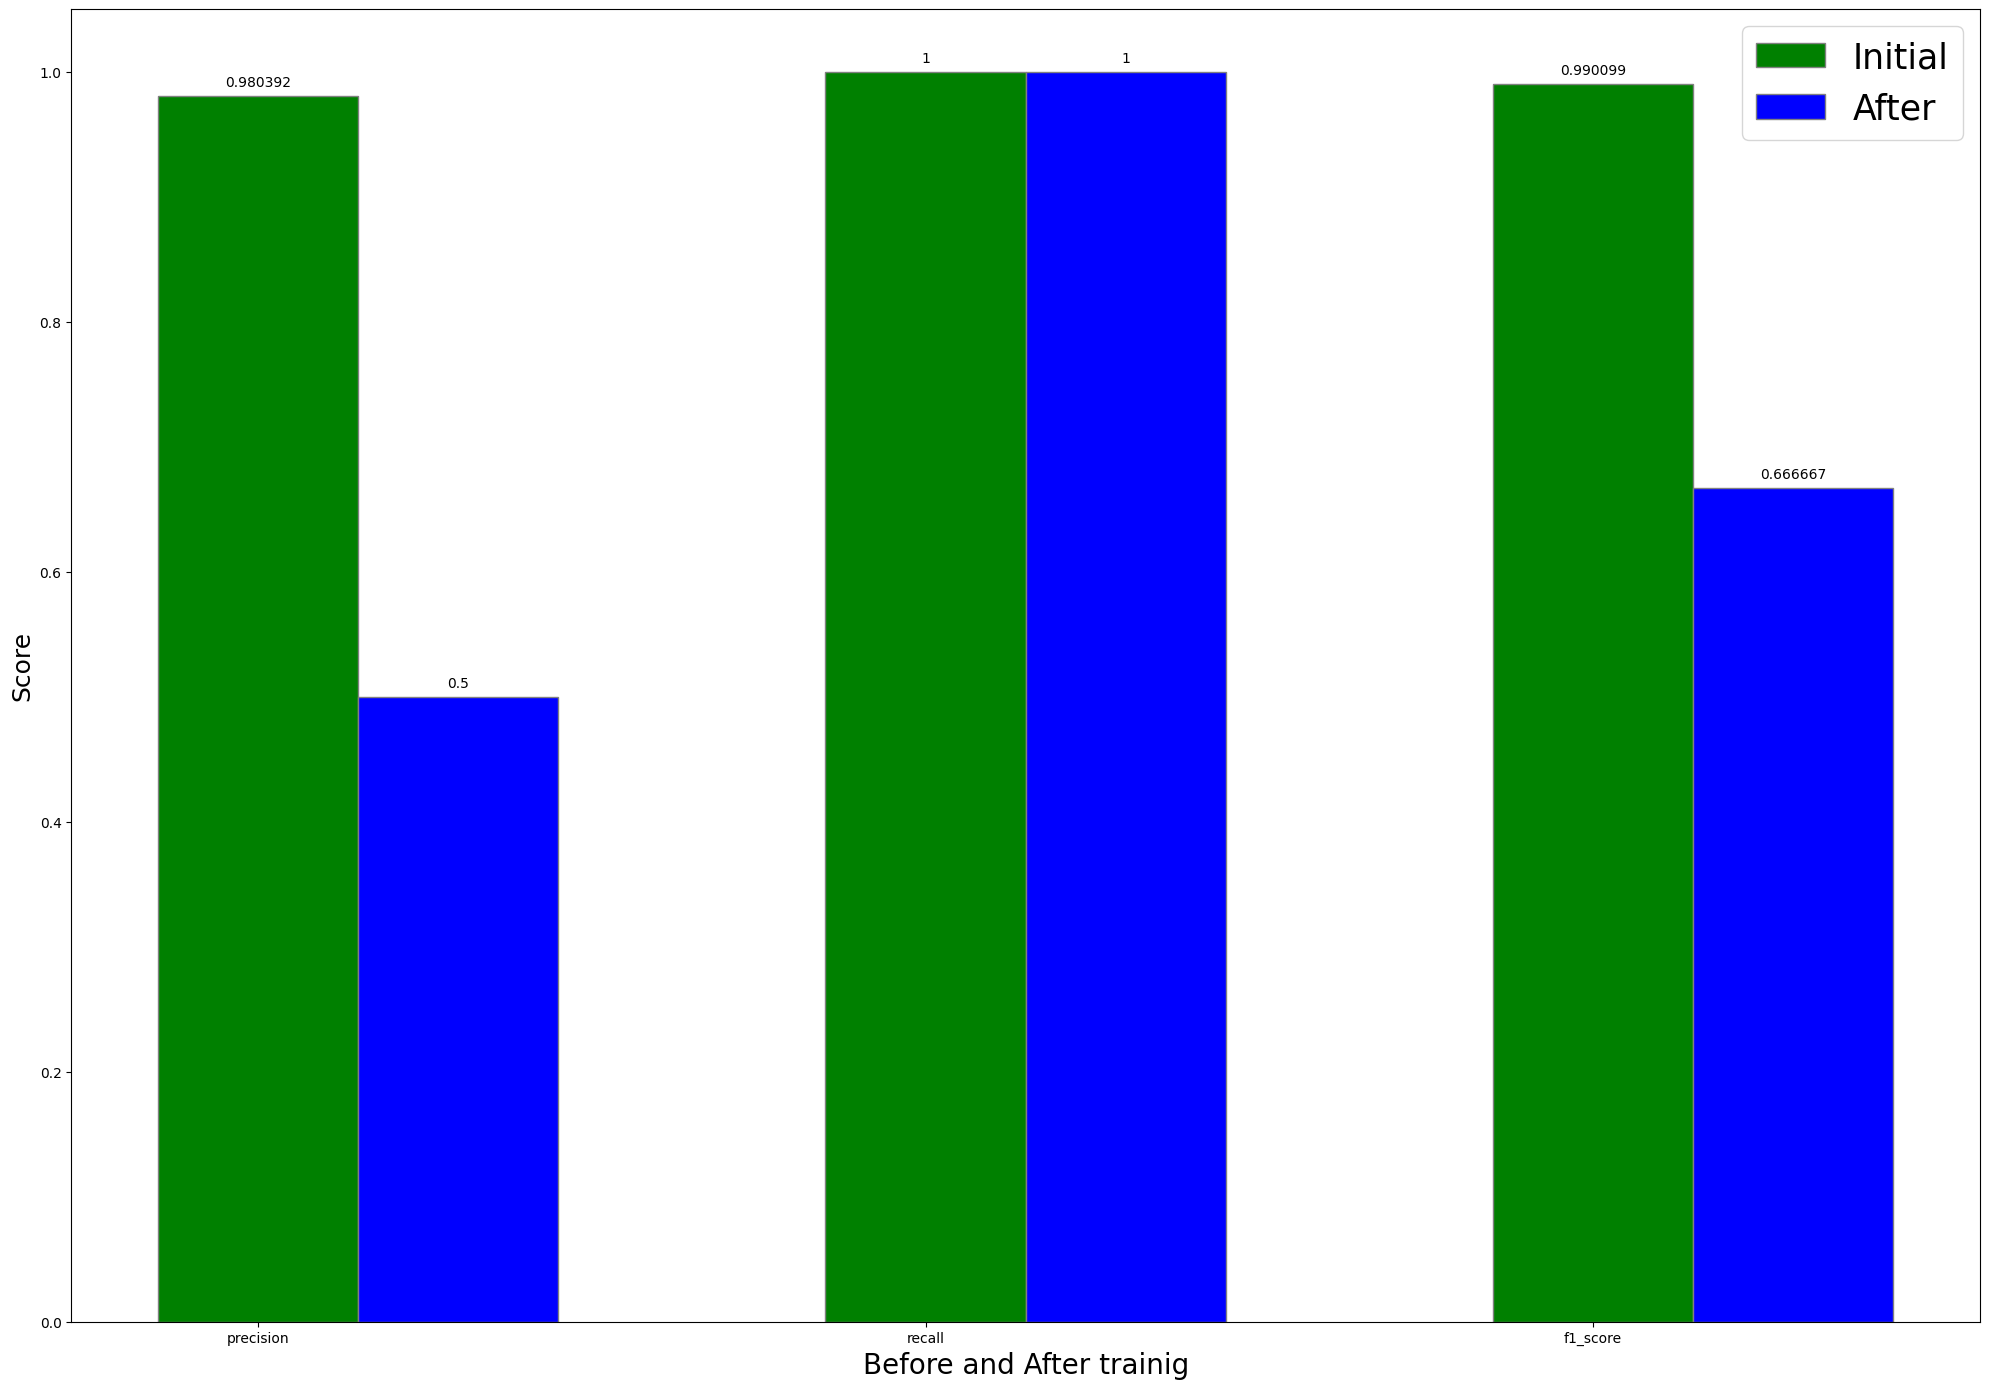

In [114]:
from tkinter import font


evaluation_data = [perceptron_conf(values[2]), perceptron_conf(values[3])]
# print(evaluation_data[0][0:3])

bar_width = 0.3
labels = ['precision', 'recall', 'f1_score']
fig, ax = plt.subplots(figsize =(20, 14))
# Set position of bar on X axis
# fig, ax = plt.subplots()
x = np.arange(len(labels))
# Set position of bar on X axis
br1 = np.arange(len(labels))
br2 = [x + bar_width for x in br1]
 
# Make the plot
rects1 = plt.bar(br1, evaluation_data[0][0:3], color ='g', width = bar_width,
        edgecolor ='grey', label ='Initial')
rects2 = plt.bar(br2, evaluation_data[1][0:3], color ='b', width = bar_width,
        edgecolor ='grey', label ='After')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend(loc='best', fontsize=25)

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=5)
plt.ylabel('Score', fontsize=18)
plt.xlabel('Before and After trainig', fontsize=20)
fig.tight_layout()
fig.savefig('../assets/figure5.png')
plt.show()

### Perceptron Optimal Threshold

In [115]:
def perceptron_optimal_threshold():
    thres_dict = {2 : [0, 0], 3 : [0, 0],
                  4 : [0, 0], 5 : [0, 0],
                  6 : [0, 0], 7 : [0, 0],
                  8 : [0, 0], 9 : [0, 0]}
    optimal_thres = 0

    for counter, ds in enumerate(challenge_ds):
        x = ds[0:784]
        y_label = int(ds[784])
        challenge_input = np.dot(np.transpose(x), values[2])
        y_value = 1 if challenge_input > optimal_thres else 0
        if y_value == 0:
            thres_dict[y_label][0] += 1
        elif y_value == 1:
            thres_dict[y_label][1] += 1
    df = pd.DataFrame(thres_dict)
    return df

print(perceptron_optimal_threshold())

    2   3   4   5   6   7   8   9
0  25  28  26  69  45   7  33  26
1  75  72  74  31  55  93  67  74


### Heat Map

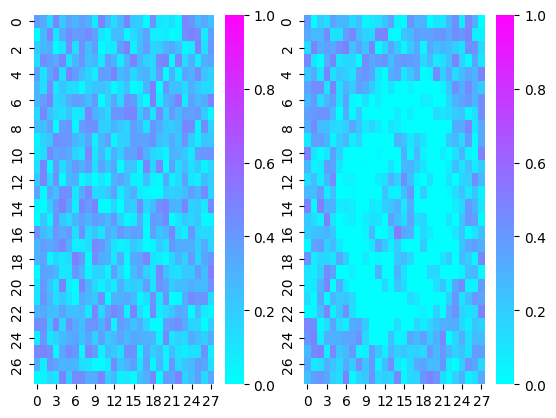

In [120]:
init_w = np.asarray(values[3])
final_w = np.asarray(values[2])
init_w_img = init_w.reshape(28, 28)
final_w_img = final_w.reshape(28, 28)
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.heatmap(init_w_img, ax=ax1, vmin=0, vmax=1, cmap = 'cool')
sns.heatmap(np.transpose(final_w_img), ax=ax2, vmin=0, vmax=1, cmap = 'cool')
plt.savefig('../assets/figure6.png')
plt.show()